# Telecom Customer Churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
churn_data = pd.read_csv("Telecom_customer_churn.csv")
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn_data.shape

(7043, 21)

In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'],errors='coerce')
churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
churn_data.fillna(churn_data['TotalCharges'].mean(),inplace=True)

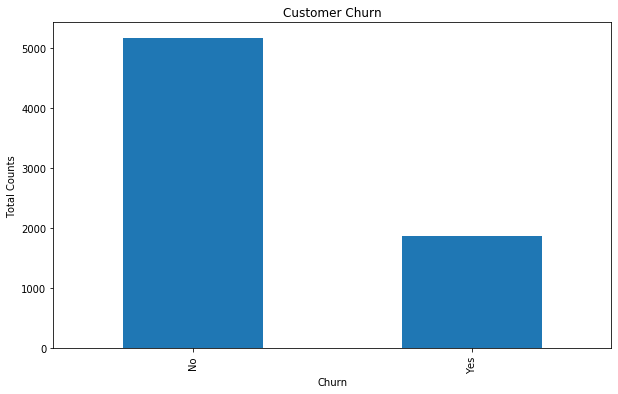

In [8]:
churn_count = churn_data['Churn'].value_counts()
plt.subplots(figsize=(10,6))
ax= churn_count.plot.bar()
ax.set(xlabel='Churn',ylabel='Total Counts', title='Customer Churn')
plt.show()

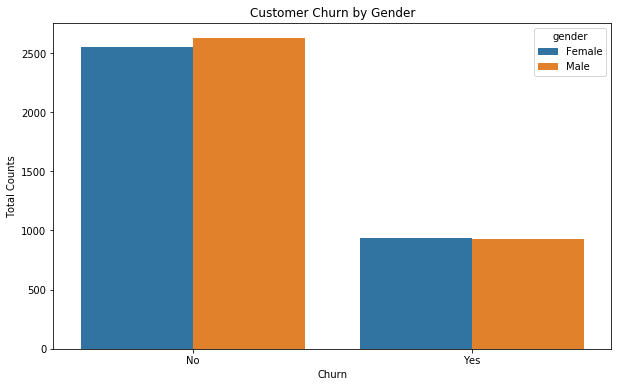

In [9]:
plt.subplots(figsize=(10,6))
ax= sns.countplot(x='Churn',hue='gender',data=churn_data)
ax.set(xlabel='Churn',ylabel='Total Counts', title='Customer Churn by Gender')
plt.show()

#More male customers churned as compared with the female customers

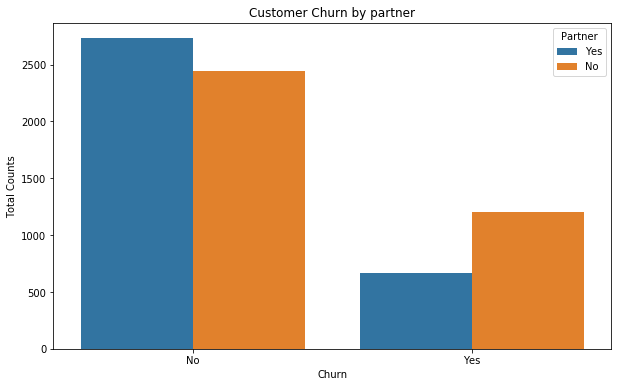

In [10]:
plt.subplots(figsize=(10,6))
ax= sns.countplot(x='Churn',hue='Partner',data=churn_data)
ax.set(xlabel='Churn',ylabel='Total Counts', title='Customer Churn by partner')
plt.show()

#customers with partners tend to churn less

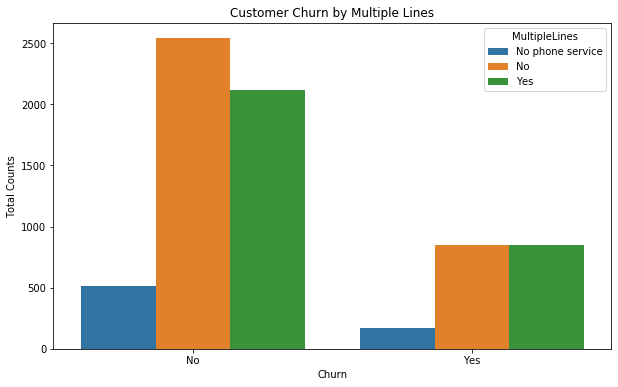

In [11]:
plt.subplots(figsize=(10,6))
ax= sns.countplot(x='Churn',hue='MultipleLines',data=churn_data)
ax.set(xlabel='Churn',ylabel='Total Counts', title='Customer Churn by Multiple Lines')
plt.show()

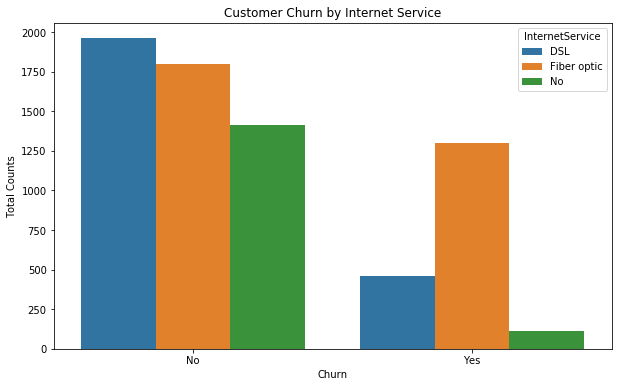

In [12]:
plt.subplots(figsize=(10,6))
ax= sns.countplot(x='Churn',hue='InternetService',data=churn_data)
ax.set(xlabel='Churn',ylabel='Total Counts', title='Customer Churn by Internet Service')
plt.show()

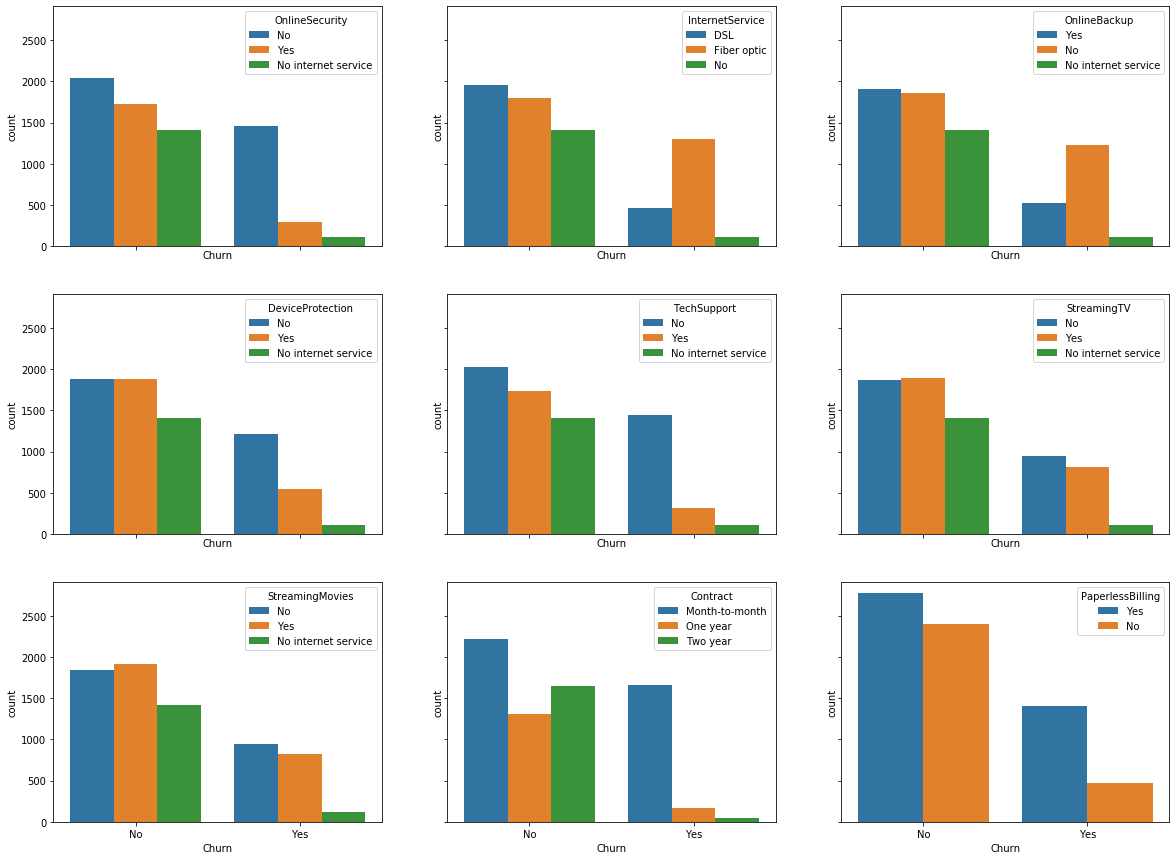

In [13]:
fig,ax = plt.subplots(nrows=3,ncols=3,sharex=True,sharey=True,figsize=(20,15))
sns.countplot(x='Churn',hue='OnlineSecurity',data=churn_data,ax=ax[0,0])
sns.countplot(x='Churn',hue='InternetService',data=churn_data,ax=ax[0,1])
sns.countplot(x='Churn',hue='OnlineBackup',data=churn_data,ax=ax[0,2])
sns.countplot(x='Churn',hue='DeviceProtection',data=churn_data,ax=ax[1,0])
sns.countplot(x='Churn',hue='TechSupport',data=churn_data,ax=ax[1,1])
sns.countplot(x='Churn',hue='StreamingTV',data=churn_data,ax=ax[1,2])
sns.countplot(x='Churn',hue='StreamingMovies',data=churn_data,ax=ax[2,0])
sns.countplot(x='Churn',hue='Contract',data=churn_data,ax=ax[2,1])
sns.countplot(x='Churn',hue='PaperlessBilling',data=churn_data,ax=ax[2,2])
plt.show()

In [14]:
churn_data.drop('customerID',axis=1,inplace=True)
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [15]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
churn_data = pd.get_dummies(churn_data,columns=['gender','Partner','Dependents','PhoneService','MultipleLines',
                                               'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                                               'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                                               'PaymentMethod'])

In [17]:
churn_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,No,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,Yes,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,No,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,Yes,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [18]:
X = churn_data.drop('Churn',axis=1)
y = churn_data['Churn']

In [22]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
scaler= StandardScaler()
y = le.fit_transform(y)
X = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y)

In [26]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred = logreg.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.90      0.87      1299\n           1       0.66      0.55      0.60       462\n\n    accuracy                           0.81      1761\n   macro avg       0.75      0.72      0.74      1761\nweighted avg       0.80      0.81      0.80      1761\n'

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1168,  131],
       [ 209,  253]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8069278818852924

AUC: 0.851


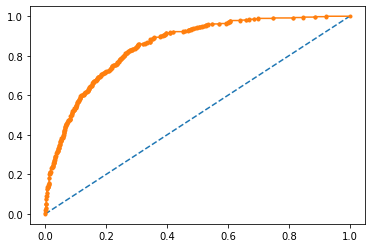

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()